# Read Data and Data cleaning

In [1]:
import os
import re
import glob
import pandas as pd
import numpy as np

places_details = pd.read_csv('./ML_interview/data/places_details.csv',encoding = 'latin_1')
places_interview = pd.read_csv('./ML_interview/data/places_interview.csv',encoding = 'latin_1')
print(places_details.columns)
print(places_interview.columns)

Index(['place_id', 'international_phone_number', 'url', 'website',
       'formatted_address', 'opening_hours'],
      dtype='object')
Index(['place_id', 'name', 'lat', 'long', 'types'], dtype='object')


In [2]:
# join two dataframe on the place_id
data = pd.merge(places_details,places_interview,on = ['place_id','place_id'])
data.head()

,place_id,international_phone_number,url,website,formatted_address,opening_hours,name,lat,long,types
0,ChIJx9oC6djOsGoRV5S3nIKZ5GU,+61 8 8231 3273,https://maps.google.com/?cid=7342162078774826071,http://www.funkcoffeefood.com.au/locations,250 Victoria Square Adelaide SA 5000 Australia,['Monday: 7:00 AM â 4:30 PM' 'Tuesday: 7:00...,Funk Coffee+Food,-34.929582,138.601152,[cafe food point_of_interest establishment]
1,ChIJ7wd7L9jOsGoR1jr5ZlwJVrQ,+61 8 8232 5115,https://maps.google.com/?cid=12994584067293395670,http://www.blefaricafe.com/,182 Victoria Square Adelaide SA 5000 Australia,['Monday: 7:00 AM â 4:30 PM' 'Tuesday: 7:00...,Blefari Caffe & Cucina,-34.927236,138.600789,[cafe food point_of_interest establishment]
2,ChIJL6NKedjOsGoRtxt8bpno46Y,+61 8 8410 3331,https://maps.google.com/?cid=12025711175690623927,https://m.facebook.com/pages/Argo-On-The-Squar...,4/211 Victoria Square Adelaide SA 5000 Austr...,['Monday: 6:30 AM â 4:00 PM' 'Tuesday: 6:30...,Argo On The Square,-34.928403,138.598956,[cafe store food point_of_interest establishment]
3,ChIJE1Co3tnOsGoRDvBB5-O9A5o,+61 8 8223 6176,https://maps.google.com/?cid=11097922693306118158,http://caferitz.com.au/,3/180 Gawler Pl Adelaide SA 5000 Australia,['Monday: 6:00 AM â 4:00 PM' 'Tuesday: 6:00...,Cafe Ritz,-34.927674,138.602349,[cafe food point_of_interest establishment]
4,ChIJ_9gQfNjOsGoRlJAeTDZsyIA,+61 8 8410 3331,https://maps.google.com/?cid=9279786012658012308,NaN,211 Victoria Square Adelaide SA 5000 Australia,NaN,Ink Cafe,-34.928276,138.598825,[cafe food point_of_interest establishment]


In [3]:
print(data['types'].describe())

count                                                  5550
unique                                                  275
top       [church place_of_worship point_of_interest est...
freq                                                   1054
Name: types, dtype: object


Analysis:<br>
Among columns, the most relavent data is 'name'. <br>
longitude and latitude may be another dependent based on the assumption that the similar restuarants are gathered.<br>
Opening hour is the last possible indicator.<br>
The rest of the data are logically irrelavent.

In [4]:
data_new = data[['place_id','name','lat','long','opening_hours','types']]
data_new.head()

,place_id,name,lat,long,opening_hours,types
0,ChIJx9oC6djOsGoRV5S3nIKZ5GU,Funk Coffee+Food,-34.929582,138.601152,['Monday: 7:00 AM â 4:30 PM' 'Tuesday: 7:00...,[cafe food point_of_interest establishment]
1,ChIJ7wd7L9jOsGoR1jr5ZlwJVrQ,Blefari Caffe & Cucina,-34.927236,138.600789,['Monday: 7:00 AM â 4:30 PM' 'Tuesday: 7:00...,[cafe food point_of_interest establishment]
2,ChIJL6NKedjOsGoRtxt8bpno46Y,Argo On The Square,-34.928403,138.598956,['Monday: 6:30 AM â 4:00 PM' 'Tuesday: 6:30...,[cafe store food point_of_interest establishment]
3,ChIJE1Co3tnOsGoRDvBB5-O9A5o,Cafe Ritz,-34.927674,138.602349,['Monday: 6:00 AM â 4:00 PM' 'Tuesday: 6:00...,[cafe food point_of_interest establishment]
4,ChIJ_9gQfNjOsGoRlJAeTDZsyIA,Ink Cafe,-34.928276,138.598825,NaN,[cafe food point_of_interest establishment]


In [5]:
# clean data

data_new.dropna(axis = 0, how = 'any', subset=['name','types']) #drop the data without name or type

col_list = data_new.columns
for i in col_list: # clean all non alphanumeric symbol
    if i not in ['lat','long']:
        temp = []
        for data in data_new[i]:
            try:
                temp.append(re.sub(r'[_â\W+]+',' ',str(data)))
            except:
                temp.append(pd.nan)
                pass
        data_new[i] = temp

data_new.head()

,place_id,name,lat,long,opening_hours,types
0,ChIJx9oC6djOsGoRV5S3nIKZ5GU,Funk Coffee Food,-34.929582,138.601152,Monday 7 00 AM 4 30 PM Tuesday 7 00 AM 4 30 P...,cafe food point of interest establishment
1,ChIJ7wd7L9jOsGoR1jr5ZlwJVrQ,Blefari Caffe Cucina,-34.927236,138.600789,Monday 7 00 AM 4 30 PM Tuesday 7 00 AM 4 30 P...,cafe food point of interest establishment
2,ChIJL6NKedjOsGoRtxt8bpno46Y,Argo On The Square,-34.928403,138.598956,Monday 6 30 AM 4 00 PM Tuesday 6 30 AM 4 00 P...,cafe store food point of interest establishment
3,ChIJE1Co3tnOsGoRDvBB5 O9A5o,Cafe Ritz,-34.927674,138.602349,Monday 6 00 AM 4 00 PM Tuesday 6 00 AM 4 00 P...,cafe food point of interest establishment
4,ChIJ 9gQfNjOsGoRlJAeTDZsyIA,Ink Cafe,-34.928276,138.598825,nan,cafe food point of interest establishment


# NLP

In [6]:
import nltk
import random
from nltk import word_tokenize
from nltk.corpus import stopwords

In [7]:
stop = set(stopwords.words('english'))
def is_ok(token):
    return bool(re.match(r'^[a-zA-Z0-9]+$',token)) and token not in stop

In [8]:
types = data_new['types'].unique()
document = []
# # collect all names information for each type
# for typ in types:
#     try:
#         names_list = data_new.loc[data_new['types'] == typ]['name']
#         words = []
#         for w in names_list:
#             for token in word_tokenize(w.lower()):
#                 if is_ok(token):
#                     words.append(token)
#         document.append((words,typ))
#     except Exception as e:
#         print(str(e))
#         pass

for i in range(len(data_new)):
    document.append((word_tokenize(data_new.loc[i][1]),data_new.loc[i][5]))
    
random.shuffle(document)

In [10]:
all_names = []
for s in document:
    for w in s[0]:
        all_names.append(w)
all_names = nltk.FreqDist(all_names)
len(all_names)

5480

In [11]:
most_freq_words = list(all_names.keys())[0:3500]

def words_counting(words_list):
        words = set(words_list)
        counting = {}
        for w in most_freq_words:
            counting[w] = (w in words)
        return counting
    
featuresets = [(words_counting(w),typ) for (w,typ) in document]

training_set = featuresets[:int(len(featuresets)*0.7)]
testing_set = featuresets[int(len(featuresets)*0.7):]


In [12]:
import threading
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

# Naive Bayesian
classifier = nltk.NaiveBayesClassifier.train(training_set)
print('Naive Bayesian:',nltk.classify.accuracy(classifier,testing_set))

# MultinomialNB
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print('MultinomialNB:',nltk.classify.accuracy(MNB_classifier,testing_set))
    

# BernoulliNB
BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print('BernoulliNB:',nltk.classify.accuracy(BNB_classifier,testing_set))

# LogisticRegression
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print('LogisticRegression:',nltk.classify.accuracy(LogisticRegression_classifier,testing_set))
    

# SGDClassifier
SGD_classifier = SklearnClassifier(SGDClassifier())
SGD_classifier.train(training_set)
print('SGDClassifier:',nltk.classify.accuracy(SGD_classifier,testing_set))

# SVC
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print('SVC:',nltk.classify.accuracy(SVC_classifier,testing_set))


# LinearSVC
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print('LinearSVC:',nltk.classify.accuracy(LinearSVC_classifier,testing_set))

Naive Bayesian: 0.570828331332533
MultinomialNB: 0.6122448979591837
BernoulliNB: 0.4909963985594238
LogisticRegression: 0.6440576230492197


D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier: 0.5996398559423769
SVC: 0.18247298919567828
LinearSVC: 0.6302521008403361


Naive Bayesian: 0.5804321728691476 <br>
MultinomialNB: 0.6068427370948379<br>
BernoulliNB: 0.5342136854741897<br>
LogisticRegression: 0.6350540216086434<br>
SGDClassifier: 0.6176470588235294<br>
SVC: 0.19627851140456182<br>
LinearSVC: 0.6374549819927972<br>
<br>
The performance of SVC is horrible. We drop it. For the rest, we keep them.

In [79]:
from sklearn.tree import DecisionTreeClassifier

# lat and long training
df_lat_long = []
for i in range(len(data_new['lat'])):
     df_lat_long.append([data_new['lat'][i],data_new['long'][i]])
df_type = data_new['types']
lat_long_classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
tree_training_set_x = df_lat_long[:int(len(df_lat_long)*0.7)]
tree_training_set_y = df_type[int(len(df_type)*0.7):]
tree_testing_set_x = df_lat_long[int(len(df_lat_long)*0.7):]
tree_testing_set_y = df_type[int(len(df_type)*0.7):]
lat_long_classifier = lat_long_classifier.fit(df_lat_long,df_type)

# accuracy calculation
result = lat_long_classifier.predict(tree_testing_set_x)
correct = tree_testing_set_y == result
print('lat_long_classifier:',sum(correct)/len(tree_testing_set_y))


lat_long_classifier: 0.720288115246


The prediction by using latitude and longtitude is impressive. It is a good predictor.

In [19]:
import pickle
# save classifiers
c_names = ['Naive Bayesian','MultinomialNB','BernoulliNB','LogisticRegression','SGDClassifier','SVC','LinearSVC','NuSVC']
def classifiers_save():
    save_c_1 = open('Naive Bayesian.pickle','wb')
    pickle.dump(classifier,save_c_1)
    save_c_1.close
    save_c_1 = open('MultinomialNB.pickle','wb')
    pickle.dump(MNB_classifier,save_c_1)
    save_c_1.close
    save_c_1 = open('BernoulliNB.pickle','wb')
    pickle.dump(BNB_classifier,save_c_1)
    save_c_1.close
    save_c_1 = open('LogisticRegression.pickle','wb')
    pickle.dump(LogisticRegression_classifier,save_c_1)
    save_c_1.close
    save_c_1 = open('SGDClassifier.pickle','wb')
    pickle.dump(SGD_classifier,save_c_1)
    save_c_1.close
    save_c_1 = open('SVC.pickle','wb')
    pickle.dump(SVC_classifier,save_c_1)
    save_c_1.close
    save_c_1 = open('LinearSVC.pickle','wb')
    pickle.dump(LinearSVC_classifier,save_c_1)
    save_c_1.close
    save_c_1 = open('lat_long_classifier.pickle','wb')
    pickle.dump(lat_long_classifier,save_c_1)
    save_c_1.close    
def classifiers_read():
    read_c_1 = open('Naive Bayesian.pickle','rb')
    classifier = pickle.load(read_c_1)
    read_c_1.close()
    read_c_1 = open('MultinomialNB.pickle','rb')
    MNB_classifier = pickle.load(read_c_1)
    read_c_1.close()
    read_c_1 = open('BernoulliNB.pickle','rb')
    BNB_classifier = pickle.load(read_c_1)
    read_c_1.close()
    read_c_1 = open('LogisticRegression.pickle','rb')
    LogisticRegression_classifier = pickle.load(read_c_1)
    read_c_1.close()
    read_c_1 = open('SGDClassifier.pickle','rb')
    SGD_classifier = pickle.load(read_c_1)
    read_c_1.close()
    read_c_1 = open('SVC.pickle','rb')
    SVC_classifier = pickle.load(read_c_1)
    read_c_1.close()
    read_c_1 = open('LinearSVC.pickle','rb')
    LinearSVC_classifier = pickle.load(read_c_1)
    read_c_1.close()
    read_c_1 = open('lat_long_classifier.pickle','rb')
    lat_long_classifier = pickle.load(read_c_1)
    read_c_1.close()
    return [classifier,MNB_classifier,BNB_classifier,LogisticRegression_classifier,
 SGD_classifier,SVC_classifier,LinearSVC_classifier,lat_long_classifier]

In [61]:
# save classifiers
classifiers_save()

In [20]:
# read classifiers
[classifier,MNB_classifier,BNB_classifier,LogisticRegression_classifier,
 SGD_classifier,SVC_classifier,LinearSVC_classifier,lat_long_classifier] = classifiers_read()

In [14]:
# voting system
from nltk.classify import ClassifierI
from scipy.stats import mode

class VoteClassifier(ClassifierI):
    def __init__(self,*classifiers):
        self._classifiers = classifiers
        self._lat_long_classifier = lat_long_classifier 
    
    def classify(self, features, lat_long_classifier = None,tree_testing_set_x = None):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        if lat_long_classifier is not None and tree_testing_set_x is not None:
            votes.append(_lat_long_classifier.predict(tree_testing_set_x))
        return mode(votes)[0][0]
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        choice_votes = votes.count(mode(votes)[0][0])
        confi = choice_votes / len(votes)
        return confi

In [21]:
voted_classifier = VoteClassifier( classifier,
                                   MNB_classifier,
                                   LogisticRegression_classifier,
                                   SGD_classifier,
                                   LinearSVC_classifier,
                                   BNB_classifier
                                 )
print('voted_classifier accuracy:', nltk.classify.accuracy(voted_classifier,testing_set))

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


voted_classifier accuracy: 0.680672268907563


Comparing name and position, the position is a better estimator for the company's category. In the next step, we will test weather this estimator has bias over different types of categories.

# Bias Test

In [71]:
import matplotlib.pyplot as plt
typ = data_new['types'].unique()
typ = list(typ)
def plot_correction_distribution(clf):    
    correction_distribution = []
    for t in typ:
        d = data_new[data_new['types'] == t]['name']
        temp_data = []
        for i in range(len(d)):
            temp_data.append((d.iloc[i],t))
        tpy_data = [(words_counting(w),t) for (w,t) in temp_data]
        correction_distribution.append(nltk.classify.accuracy(clf,tpy_data))
    plt.plot(range(len(correction_distribution)),correction_distribution)
    plt.show()

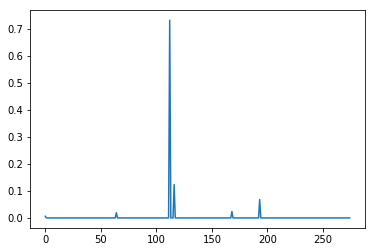

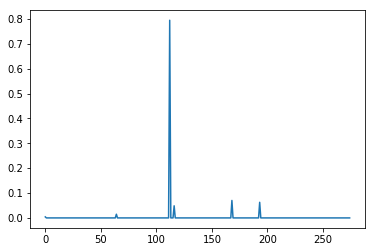

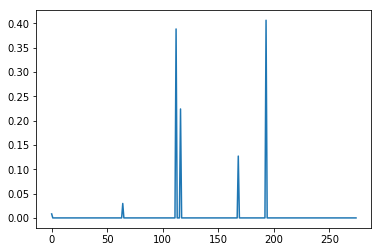

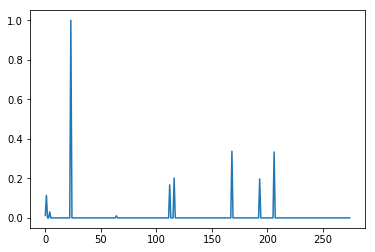

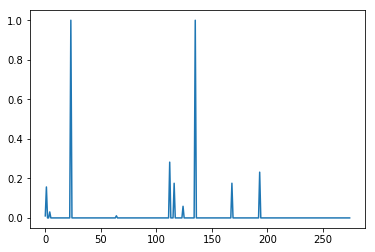

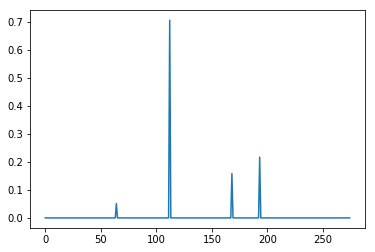

In [72]:
plot_correction_distribution(classifier)
plot_correction_distribution(MNB_classifier)
plot_correction_distribution(LogisticRegression_classifier)
plot_correction_distribution(SGD_classifier)
plot_correction_distribution(LinearSVC_classifier)
plot_correction_distribution(BNB_classifier)


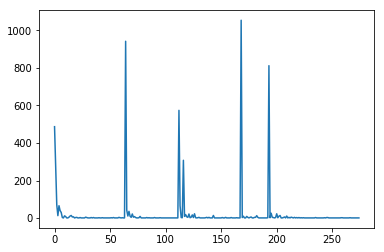

In [77]:
y = []
for t in typ:
    d = data_new[data_new['types'] == t]['name']
    y.append(len(d))
plt.plot(range(len(typ)),y)
plt.show()

Looking at the figures above, we could see the power of 'voting'/'crowed'. Several model compensate for each other.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


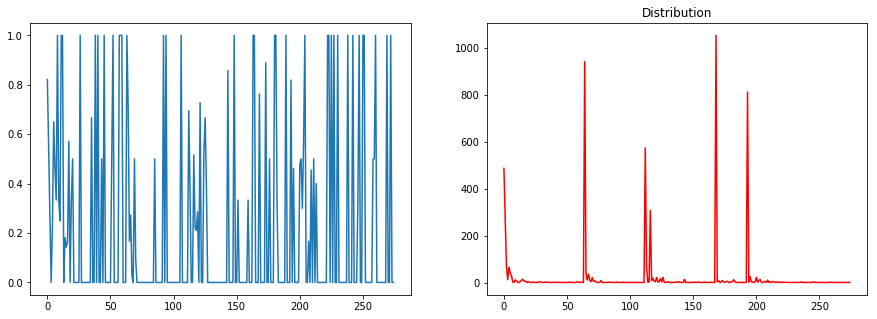

In [107]:
def plot_correction_distribution2(clf):    
    correction_distribution = []
    y = []
    for t in typ:
        d_lat = data_new[data_new['types'] == t][['lat','long']]
        count = 0
        for i in range(len(d_lat)):
            count += clf.predict(d_lat.iloc[i].reshape(-1,2))[0] == t 
        y.append(len(d_lat))
        correction_distribution.append(count/len(d_lat))
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.plot(range(len(correction_distribution)),correction_distribution)
    ax2.plot(range(len(typ)),y,c = 'r')
    ax2.set_title('Distribution')
    plt.show()
plot_correction_distribution2(lat_long_classifier)

In [ ]:
# # read miscellaneous txt file in the folder 
# # (1) as single file is small, memory overflow is not a concern
# txt_files = glob.glob('./ML_interview/data/information/*.txt')
# content = []
# for i in range(len(txt_files)):
#     f = open(txt_files[i],'r',encoding = 'latin_1')
#     content.append(f.read())
#     txt_files[i] = os.path.basename(txt_files[i])
#     txt_files[i] = os.path.splitext(txt_files[i])[0]
# content = pd.Series(content)
# txt_files = pd.Series(txt_files)
# mis_data = pd.concat([txt_files,content],axis = 1)
# mis_data.columns = ['place_id','miscellaneous']
# #data = data.merge(mis_data, on='place_id', how = 'left')
# data.head(20)